***PROYECTO METRO DE PANAMÁ***


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#DataFrame a utilizar
path = '/content/drive/MyDrive/Metro_de_Panama/METRO_DE_PANAMA.csv'

- Fecha: Enmarca el mes y el año de los datos presentados.
- Pasajeros mensual: Es el total de pasajeros que recorrieron el metro en el mes indicado.
- Pasajeros regulares: Son los pasajeros que pagan la tarifa general del metro (0.35 centavos) al no estar contemplados en ninguna de las excepciones que la administración ofrece.
- Estudiantes: Esta categoría es ofrecida a los chicos de las escuelas, los mismos deben realizar un trámite aparte para poder adquirir la tarjeta estudiantil la cual les permite realizar un pago de 0.17 centavos.
- Jubilados: A este grupo se le aplica el descuento ya establecido en las leyes del país del 30%, el mismo les permite pagar un pasaje de 0.24 centavos. También es necesario realizar un trámite adicional para obtener la tarjeta que permite efectuar dicho descuento.
- Discapacitados: Este grupo también presenta un descuento similar al de los jubilados.
- Montos reales: los 3 grupos que se presentan con este nombre engloban el total de dinero obtenido de los diversos grupos a nivel mensual.




In [4]:
data = pd.read_csv(path, encoding="latin1", sep=";")

In [42]:
data.head()

,ï»¿FECHA,PASAJEROS MENSUAL,Pasajeros Regulares,Monto Real,Estudiantes,Monto Real .1,Jubilados,Monto Real .2,Discapacitados,Monto Real .3,monto_final
0,ENERO 2017,6254437.0,"6,098,587","B/.2,134,505.45",0,B/.-,"153,673","B/.53,785.55","2,177",B/.761.95,2189052.95
1,FEBRERO 2017,5799570.0,"5,684,789","B/.1,989,676.15",0,B/.-,"113,053","B/.39,568.55","1,728",B/.604.80,2029849.50
2,MARZO 2017,6981792.0,"6,788,179","B/.2,375,864.09","42,846","B/.14,996.10","148,319","B/.51,911.65","2,448",B/.856.80,2443628.64
3,ABRIL 2017,5797643.0,"5,622,331","B/.1,967,815.85","48,228","B/.16,879.80","124,910","B/.43,718.50","2,174",B/.760.90,2029175.05
4,MAYO 2017,7654786.0,"7,419,367","B/.2,596,778.45","65,876","B/.23,056.60","166,608","B/.58,312.80","2,935","B/.1,027.25",2679175.10


In [6]:
df = pd.DataFrame(data)

In [61]:
#Extracción de los headers de cada columna
df.columns

Index(['FECHA', 'PASAJEROS MENSUAL', 'Pasajeros Regulares', ' Monto Real ',
       'Estudiantes', ' Monto Real .1', 'Jubilados', ' Monto Real .2',
       'Discapacitados', ' Monto Real .3', 'monto_final', 'nueva_columna'],
      dtype='object')

***MONTOS FINALES MENSUALES***


In [56]:
num_filas = df.shape[0]
montos = []
montos_finales = []

for rp in range(num_filas):
  montos.append(df.iloc[rp,3])
  montos.append(df.iloc[rp,5])
  montos.append(df.iloc[rp,7])
  montos.append(df.iloc[rp,9])

  for element in range(len(montos)):
    cadena = montos[element]
    cadena = cadena.replace('B/.', '')
    cadena = cadena.replace(',','')
    cadena = cadena.replace('-','0')

    montos[element] = float(cadena)
  monto= sum(montos)
  montos_finales.append(round(monto, 2))
  montos = []

""" funcion para agregar la columna monto final y al mismo tiempo reemplazar todos los signos a nada y solo dejar los numeros y junto
que sume los valores de las 4 columnas fila por fila
"""
df['monto_final'] = df.apply(lambda row: sum(float(row.iloc[i].replace('B/.', '').replace(',', '').replace('-', '0')) for i in [3, 5, 7, 9]), axis=1)
print(df['monto_final'])

0     2189052.95
1     2029849.50
2     2443628.64
3     2029175.05
4     2679175.10
         ...    
79    4636767.90
80    4596261.30
81    4707947.35
82    3938995.45
83    4662053.45
Name: monto_final, Length: 84, dtype: float64


0          ENERO 2017
1        FEBRERO 2017
2          MARZO 2017
3          ABRIL 2017
4           MAYO 2017
           ...       
79        AGOSTO 2023
80    SEPTIEMBRE 2023
81       OCTUBRE 2023
82     NOVIEMBRE 2023
83     DICIEMBRE 2023
Name: FECHA, Length: 84, dtype: object


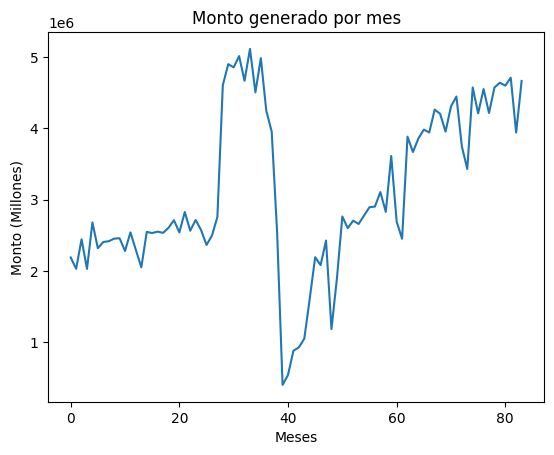

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
print(df['FECHA'])
grafica = pd.Series(df['monto_final'])
plt.title('Monto generado por mes')
plt.xlabel('Meses')
plt.ylabel('Monto (Millones)')
plt.plot(grafica)

DEMANDA DE PASAJEROS DE FORMA MENSUAL

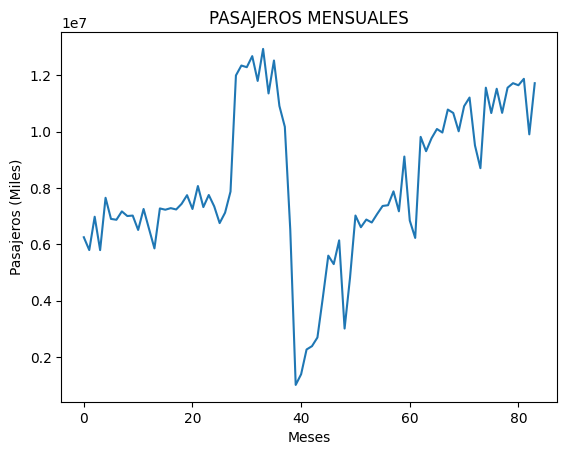

In [59]:
grafica = pd.Series(df['PASAJEROS MENSUAL'])
plt.title('PASAJEROS MENSUALES')
plt.xlabel('Meses')
plt.ylabel('Pasajeros (Miles)')
plt.plot(grafica)

***MES Y AÑO CON MAYOR Y MENOR GANACIA***

In [50]:
#primero buscamos el maximo luego la fila donde lo encontramos y terminamos buscando el mes con la fila
#primero buscamos el maximo luego la fila donde lo encontramos y terminamos buscando el mes con la fila
mes_maximo = df['monto_final'].max()
fila_mes_maximo = df[df['monto_final'] == mes_maximo]
fecha_mes_maximo = fila_mes_maximo['FECHA'].values[0]
print(f"Mes con mayor Ganancia es {fecha_mes_maximo} con el monto de: {round(mes_maximo, 2)}")

mes_minimo = df['monto_final'].min()
fila_mes_minimo = df[df['monto_final'] == mes_minimo]
fecha_mes_minimo = fila_mes_minimo['FECHA'].values[0]
print(f"Mes con menor Ganancia es {fecha_mes_minimo} con el monto de: {round(mes_minimo, 2)}")



Mes con mayor Ganancia es OCTUBRE 2019 con el monto de: 5110697.45
Mes con menor Ganancia es ABRIL 2020 con el monto de: 403000.65


***MES CON MAYOR Y MENOR CANTIDAD DE PASAJEROS***

In [12]:
#Pasajeros maximos y minimos
df['PASAJEROS MENSUAL'] = df['PASAJEROS MENSUAL'].str.replace(',', '').str.replace('-', '0').astype(float)
mes_maximo_pasajeros = df['PASAJEROS MENSUAL'].max()
fila_mes_maximo_pasajeros = df[df['PASAJEROS MENSUAL'] == mes_maximo_pasajeros]
fecha_mes_maximo_pasajeros = fila_mes_maximo_pasajeros['ï»¿FECHA'].values[0]
print(f"Mes con mayor numero de usuarios es {fecha_mes_maximo_pasajeros} con la cantidad de: {round(mes_maximo_pasajeros, 0)}")

mes_minimo_pasajeros = df['PASAJEROS MENSUAL'].min()
fila_mes_minimo_pasajeros = df[df['PASAJEROS MENSUAL'] == mes_minimo_pasajeros]
fecha_mes_minimo_pasajeros = fila_mes_minimo_pasajeros['ï»¿FECHA'].values[0]
print(f"Mes con menor numero de usuarios es {fecha_mes_minimo_pasajeros} con el cantidad de: {round(mes_minimo_pasajeros, 0)}")


Mes con mayor numero de usuarios es OCTUBRE 2019 con la cantidad de: 12936982.0
Mes con menor numero de usuarios es ABRIL 2020 con el cantidad de: 1013895.0


***MEDIA DE PASAJEROS***

In [15]:
#Media pasajeros
media_pasajeros = df['PASAJEROS MENSUAL'].mean()
print("La media de pasajeros mensualmente es: ", round(media_pasajeros, 0))

La media de pasajeros mensualmente es:  8115111.0
